# Sklearn

In [11]:
from pandas.core.common import random_state
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
datasets.load_iris()
iris = datasets.load_iris()
X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X, y)
accuracy_score(y, knn.predict(X))

1.0

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
accuracy_score(y, dtc.predict(X))

1.0

### Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9333333333333333

# Preprocessing data

In [19]:
from sklearn import preprocessing

X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

X_scaled = preprocessing.scale(X_train)   # default axis=0 standardize each feature

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [20]:
sss = preprocessing.StandardScaler().fit(X_train)
sss.transform(X_train)
# Ora posso usare sss su X_test per normalizzarlo nello stesso modo

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## MinMax Scaling

In [22]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler((0,1)) #viene applicato sulla colonna delle features
min_max_scaler.fit(X_train)
min_max_scaler.transform(X_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

## RobustScaler
Se ci sono tanti outliers usare media e varianza non è la cosa migliore, quindi uso robust scaler $x\_scaled = \frac{x - x.median(axis=0)}{|x.IQR(axis=0)|}$

IQR è il range tra il primo quantile e il terzo

In [28]:
from sklearn.preprocessing import RobustScaler, binarize

X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = RobustScaler().fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## Normalization

Fa lo scaling su ogni sample (riga) in modo che la sua norma sia 1.
Ovvero tutte le feature al quadrato sotto radice quadrata facciano 1.
Esiste l1, meglio per sparseness, e l2 norm, meglio per smoothness and rotational invariance.

In [30]:
X = np.array([[1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### OneHotEncoder
Per trasfomare stringhe in numeri (booleani)

In [31]:
X = [['male', 'Spain', 'tennis'],
     ['female', 'Italy', 'football'],
     ['female', 'Italy', 'painting'],
     ['male', 'Spain', 'tennis'],
     ['female', 'France', 'football'],
     ['male', 'Italy', 'painting']]
pd.DataFrame(X, columns=['gender', 'locations', 'hobbies'])


,gender,locations,hobbies
0,male,Spain,tennis
1,female,Italy,football
2,female,Italy,painting
3,male,Spain,tennis
4,female,France,football
5,male,Italy,painting


In [35]:
enc = preprocessing.OneHotEncoder().fit(X)
enc.transform(X).toarray()

array([[0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0.]])

In [36]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['France', 'Italy', 'Spain'], dtype=object),
 array(['football', 'painting', 'tennis'], dtype=object)]

### OrdinalEncoder
Invece di creare una colonna booleana per ogni possibile valore di una feature crea un sola colonna per feature e assegna ad ogni valore un numero identificativo

In [38]:
enc = preprocessing.OrdinalEncoder().fit(X)

In [40]:
enc.transform(X)

array([[1., 2., 2.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 2., 2.],
       [0., 0., 0.],
       [1., 1., 1.]])

### Discretization

Nei KBinsDiscretizer:
#### encoder
- ordinal, numeri interi
- onehot, binario
#### strategy:
- uniform
- quantile
- kmeans (cluster)

In [49]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 13 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
# così in nbins sto dando il numero di bins per ogni feature
est.transform(X)

/Users/gabrieledavena/Uni/Big Data/BData/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

### Binarizer

In [51]:
X = [[1., -1., 2.],
     [2., 0., 0.],
     [0., 1., -1.]]
binarizer = preprocessing.Binarizer(threshold=1.1).fit(X)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

### Custom transformers

In [57]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X=np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

# Classification Metrics
### Accuracy Score
True positive / all samples
### Precision
$$ Precision = \frac{TP}{TP+FP} $$
### Recall (True positive rates)
$$ Recall = \frac{TP}{TP+FN} $$
### F1 Score
armonic mean of precision and recall
$$ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{2*precision*recall}{precision + recall} $$

## Receiver operating charateristic (ROC)
Un plot che mostra le performance di un classificatore binario al variare del threshold.
Si fa confrontando TPR e FPR.

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[ inf 0.8  0.4  0.35 0.1 ]


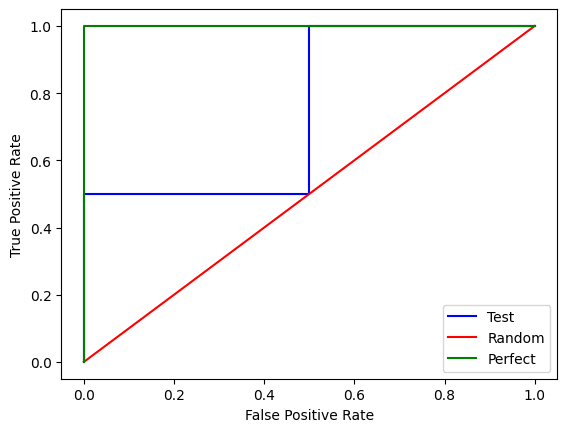

In [63]:
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr,'b-',label = 'Test')
plt.plot([0,1],[0,1],'r-',label='Random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='Perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Un modello che indovina a caso porterà alla linea rossa, vogliamo quindi qualcosa ceh sia il più lontano possibile. Per analizzare i risultati usiamo l'area sotto la curva.

In [64]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

### Confusion Matrix
Sulla diagonale principale ho i true positive.

In [65]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### Classification Report
Genera un testo per mostrare le metriche. Support sono il numero di esempi usati

In [66]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



### Explained variance score

$$ explained\_variance(\hat{y}, y) = 1 - \frac{Var\{y - \hat{y}\}}{Var\{y\}} $$

The best possible score is 1.0, lower values are worse.

In [68]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
# y_pred = [12.5, 1005.0, 12, 18]
print(explained_variance_score(y_true, y_pred))

0.9571734475374732


## Cross validation Iterators
#### k-fold
Divido il dataset in k fold, ogni elemento viene usato 1 volta come test e le altre come train

In [76]:
from sklearn.model_selection import KFold
X = np.array(["a", "b", "c", "d"])
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test)) # stampo gli indici degli elementi che in questo fold sono train e test
    print(X[train])
    print(X[test])

[2 3] [0 1]
['c' 'd']
['a' 'b']
[0 1 3] [2]
['a' 'b' 'd']
['c']
[0 1 2] [3]
['a' 'b' 'c']
['d']


### Repeated K-fold.
Example of 2-fold K-fold repeated 2 times:

In [81]:
from sklearn.model_selection import  RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("-- %s %s" % (train, test)) # stampo gli indici degli elementi che in questo fold sono train e test
    print(X[train])
    print("@@@@@")
    print(X[test])
    print("_____")

-- [2 3] [0 1]
[[1 2]
 [3 4]]
@@@@@
[[1 2]
 [3 4]]
_____
-- [0 1] [2 3]
[[1 2]
 [3 4]]
@@@@@
[[1 2]
 [3 4]]
_____
-- [0 2] [1 3]
[[1 2]
 [1 2]]
@@@@@
[[3 4]
 [3 4]]
_____
-- [1 3] [0 2]
[[3 4]
 [3 4]]
@@@@@
[[1 2]
 [1 2]]
_____


# Da finire di scrivere (puoi anche non farlo si capisce ed è abbastanza sintetico 7a)

# Pipeline
### SET-UP

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


### Pipeline base

In [4]:
preprocessing_transformer = Pipeline(steps=[('scale_01', MinMaxScaler(feature_range=(0, 1))),
                                            ('PCA', PCA(n_components=2))])

model = LogisticRegression(solver='lbfgs', multi_class='auto')

my_pipeline = Pipeline(steps=[('preprocessing', preprocessing_transformer),
                              ('model', model)],
                       verbose=True)

my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)
score = accuracy_score(y_valid, preds)
print('Accuracy: %.2f%%' % (score * 100))

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
Accuracy: 86.67%


/Users/gabrieledavena/Uni/Big Data/BData/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Column Transformer
#### SET-UP

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("../7-Sklearn advanced/data/melb_data.csv")
columns = dataset.columns.to_list()
if 'Price' in columns:
  columns.remove('Price')

X = dataset[columns]
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
# Divido le colonne in categorical e numerical
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_cols),
       ('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough')
# remainder='passthrough' serve a dire che non bisogna agire sulle colonne che non sono citate in transformers. Volendo posso anche dare un OneHotEncoder, in modo che se le colonne sono stringhe non mi generi errore facendo un MSE o MAE

model = RandomForestRegressor(n_estimators=10, random_state=0)

my_pipeline = Pipeline(steps=[
                              ('preprocessor', preprocessor),
                              ('model', model),
                             ])

my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)

score = mean_absolute_error(y_test, preds)
print('MAE:', score)

MAE: 173085.5993863525


Per passare i parametri ai vari step uso 'nomefunc__nomeparam'

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'model__n_estimators': [1,5,10],
    'preprocessor__num__strategy': ['most_frequent','constant'],
    'preprocessor__cat__imputer__strategy': ['most_frequent','constant'],
}

gs_clf = GridSearchCV(my_pipeline, parameters, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

gs_clf.fit(X, y)

gs_clf.best_params_

{'model__n_estimators': 10,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__num__strategy': 'most_frequent'}

### FeatureUnion
Concateno i risultati di diverse trasformazioni eseguite in parallelo

In [15]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [17]:
pca = PCA(n_components=2)                           #nfeautes =2
selection = SelectKBest(k=2)                        #nfeautes =2
scaler = MinMaxScaler(feature_range=(0, 1))         #nfeautes =4

# Build estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection), ("normal", scaler)])

X_features = combined_features.fit(X, y).transform(X)   #nfeautes =8 (somma delle altre)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                              ('model', model)
                             ], verbose = True)
my_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)
score = accuracy_score(y_valid, preds)
print('Accuracy Score:', score)

[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
Accuracy Score: 1.0


### FunctionTransformer
Permette di usare in una pipeline una funzione definita dall'utente

In [20]:
from sklearn.preprocessing import FunctionTransformer

#Selecting the numerical columns
def columns_num(X):
    numerical_cols = [cname for cname in X.columns if  X[cname].dtype in ['int64', 'float64']]
    return X.loc[:,numerical_cols]

fill_na_transformer = Pipeline(steps=[ ('drop_cols', FunctionTransformer(columns_num, validate=False)), #prende solo le colonne numeriche usando la funzione columns_num(X)
                                       ('fill_na', SimpleImputer(strategy='most_frequent')) ], verbose=True)
